In [1]:
# Test 4-1 Dataset 4 v2
# This test uses the new dataset 16000 images
# This test uses a simple CNN to classify between having an circle or parcial circle


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import shutil
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-04-17 00:06:32.504807: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 00:06:32.504833: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 00:06:32.505515: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-17 00:06:32.510694: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 00:06:33.171998: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_6/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_6/test'

In [4]:
IMG_SIZE = 250
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

312


In [5]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
    )

Found 10000 files belonging to 2 classes.


2024-04-17 00:06:34.125911: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-17 00:06:34.126107: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-17 00:06:34.126206: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 5000 files belonging to 2 classes.


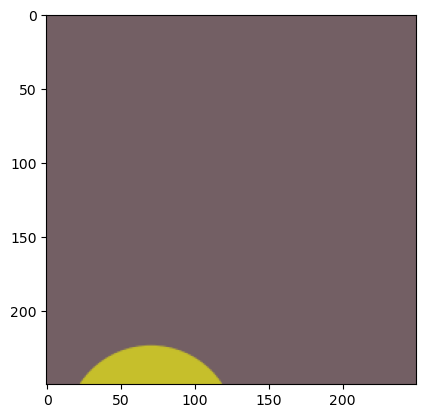

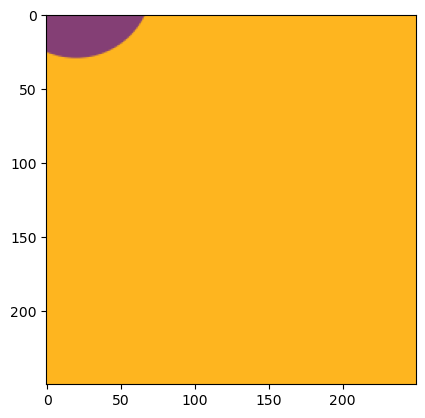

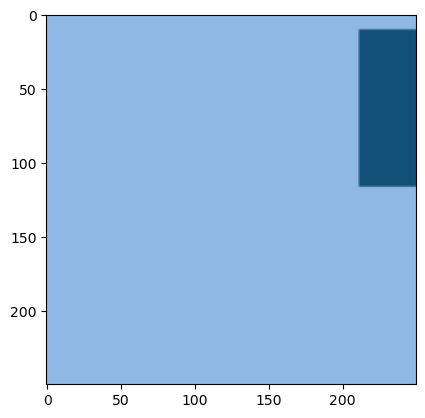

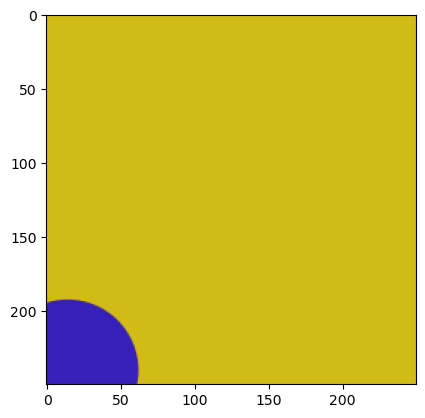

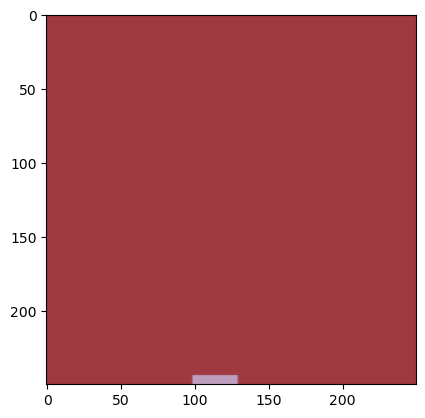

In [6]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [7]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                        

In [9]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [10]:
checkpoint_filepath = 'models/6/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)



In [11]:
# Best Epoch = ?
history = model.fit(train_dataset, epochs=100, batch_size=16, validation_data=test_dataset, callbacks=[callbacks,early_stop])

Epoch 1/30


2024-04-17 00:06:43.300784: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-17 00:06:43.388497: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-17 00:06:43.500200: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 532.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-04-17 00:06:43.614606: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 532.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-04-17 00:06:44.400181: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb33c848f70 init

313/313 [==============================] - ETA: 0s - loss: 0.6938 - acc: 0.5076
Epoch 1: val_loss improved from inf to 0.69311, saving model to models/6/ch-001.ckpt
INFO:tensorflow:Assets written to: models/6/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-001.ckpt/assets


313/313 [==============================] - 25s 65ms/step - loss: 0.6938 - acc: 0.5076 - val_loss: 0.6931 - val_acc: 0.5100
Epoch 2/30
312/313 [============================>.] - ETA: 0s - loss: 0.6933 - acc: 0.5020
Epoch 2: val_loss improved from 0.69311 to 0.69288, saving model to models/6/ch-002.ckpt
INFO:tensorflow:Assets written to: models/6/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-002.ckpt/assets


313/313 [==============================] - 19s 60ms/step - loss: 0.6933 - acc: 0.5021 - val_loss: 0.6929 - val_acc: 0.5082
Epoch 3/30
313/313 [==============================] - ETA: 0s - loss: 0.6930 - acc: 0.5119
Epoch 3: val_loss improved from 0.69288 to 0.69265, saving model to models/6/ch-003.ckpt
INFO:tensorflow:Assets written to: models/6/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-003.ckpt/assets


313/313 [==============================] - 18s 59ms/step - loss: 0.6930 - acc: 0.5119 - val_loss: 0.6926 - val_acc: 0.5002
Epoch 4/30
313/313 [==============================] - ETA: 0s - loss: 0.6919 - acc: 0.5210
Epoch 4: val_loss improved from 0.69265 to 0.69219, saving model to models/6/ch-004.ckpt
INFO:tensorflow:Assets written to: models/6/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-004.ckpt/assets


313/313 [==============================] - 18s 58ms/step - loss: 0.6919 - acc: 0.5210 - val_loss: 0.6922 - val_acc: 0.5100
Epoch 5/30
313/313 [==============================] - ETA: 0s - loss: 0.6888 - acc: 0.5317
Epoch 5: val_loss improved from 0.69219 to 0.68961, saving model to models/6/ch-005.ckpt
INFO:tensorflow:Assets written to: models/6/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-005.ckpt/assets


313/313 [==============================] - 18s 58ms/step - loss: 0.6888 - acc: 0.5317 - val_loss: 0.6896 - val_acc: 0.5340
Epoch 6/30
313/313 [==============================] - ETA: 0s - loss: 0.6860 - acc: 0.5451
Epoch 6: val_loss improved from 0.68961 to 0.68563, saving model to models/6/ch-006.ckpt
INFO:tensorflow:Assets written to: models/6/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-006.ckpt/assets


313/313 [==============================] - 18s 58ms/step - loss: 0.6860 - acc: 0.5451 - val_loss: 0.6856 - val_acc: 0.5518
Epoch 7/30
312/313 [============================>.] - ETA: 0s - loss: 0.6838 - acc: 0.5515
Epoch 7: val_loss improved from 0.68563 to 0.68553, saving model to models/6/ch-007.ckpt
INFO:tensorflow:Assets written to: models/6/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-007.ckpt/assets


313/313 [==============================] - 19s 59ms/step - loss: 0.6838 - acc: 0.5515 - val_loss: 0.6855 - val_acc: 0.5484
Epoch 8/30
312/313 [============================>.] - ETA: 0s - loss: 0.6796 - acc: 0.5648
Epoch 8: val_loss did not improve from 0.68553
313/313 [==============================] - 18s 57ms/step - loss: 0.6796 - acc: 0.5649 - val_loss: 0.6859 - val_acc: 0.5464
Epoch 9/30
312/313 [============================>.] - ETA: 0s - loss: 0.6786 - acc: 0.5621
Epoch 9: val_loss improved from 0.68553 to 0.68405, saving model to models/6/ch-009.ckpt
INFO:tensorflow:Assets written to: models/6/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-009.ckpt/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.6786 - acc: 0.5620 - val_loss: 0.6840 - val_acc: 0.5548
Epoch 10/30
313/313 [==============================] - ETA: 0s - loss: 0.6749 - acc: 0.5722
Epoch 10: val_loss did not improve from 0.68405
313/313 [==============================] - 18s 57ms/step - loss: 0.6749 - acc: 0.5722 - val_loss: 0.6880 - val_acc: 0.5514
Epoch 11/30
313/313 [==============================] - ETA: 0s - loss: 0.6697 - acc: 0.5810
Epoch 11: val_loss improved from 0.68405 to 0.68330, saving model to models/6/ch-011.ckpt
INFO:tensorflow:Assets written to: models/6/ch-011.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-011.ckpt/assets


313/313 [==============================] - 19s 60ms/step - loss: 0.6697 - acc: 0.5810 - val_loss: 0.6833 - val_acc: 0.5564
Epoch 12/30
312/313 [============================>.] - ETA: 0s - loss: 0.6638 - acc: 0.5889
Epoch 12: val_loss improved from 0.68330 to 0.68277, saving model to models/6/ch-012.ckpt
INFO:tensorflow:Assets written to: models/6/ch-012.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-012.ckpt/assets


313/313 [==============================] - 19s 62ms/step - loss: 0.6638 - acc: 0.5890 - val_loss: 0.6828 - val_acc: 0.5652
Epoch 13/30
312/313 [============================>.] - ETA: 0s - loss: 0.6530 - acc: 0.6134
Epoch 13: val_loss improved from 0.68277 to 0.68101, saving model to models/6/ch-013.ckpt
INFO:tensorflow:Assets written to: models/6/ch-013.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-013.ckpt/assets


313/313 [==============================] - 20s 63ms/step - loss: 0.6528 - acc: 0.6136 - val_loss: 0.6810 - val_acc: 0.5798
Epoch 14/30
313/313 [==============================] - ETA: 0s - loss: 0.6351 - acc: 0.6299
Epoch 14: val_loss improved from 0.68101 to 0.67921, saving model to models/6/ch-014.ckpt
INFO:tensorflow:Assets written to: models/6/ch-014.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-014.ckpt/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.6351 - acc: 0.6299 - val_loss: 0.6792 - val_acc: 0.5946
Epoch 15/30
313/313 [==============================] - ETA: 0s - loss: 0.5964 - acc: 0.6708
Epoch 15: val_loss improved from 0.67921 to 0.62151, saving model to models/6/ch-015.ckpt
INFO:tensorflow:Assets written to: models/6/ch-015.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-015.ckpt/assets


313/313 [==============================] - 19s 60ms/step - loss: 0.5964 - acc: 0.6708 - val_loss: 0.6215 - val_acc: 0.6630
Epoch 16/30
313/313 [==============================] - ETA: 0s - loss: 0.5239 - acc: 0.7323
Epoch 16: val_loss improved from 0.62151 to 0.50582, saving model to models/6/ch-016.ckpt
INFO:tensorflow:Assets written to: models/6/ch-016.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-016.ckpt/assets


313/313 [==============================] - 20s 62ms/step - loss: 0.5239 - acc: 0.7323 - val_loss: 0.5058 - val_acc: 0.7602
Epoch 17/30
312/313 [============================>.] - ETA: 0s - loss: 0.4268 - acc: 0.7970
Epoch 17: val_loss improved from 0.50582 to 0.41863, saving model to models/6/ch-017.ckpt
INFO:tensorflow:Assets written to: models/6/ch-017.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-017.ckpt/assets


313/313 [==============================] - 19s 62ms/step - loss: 0.4266 - acc: 0.7971 - val_loss: 0.4186 - val_acc: 0.7984
Epoch 18/30
312/313 [============================>.] - ETA: 0s - loss: 0.3489 - acc: 0.8363
Epoch 18: val_loss did not improve from 0.41863
313/313 [==============================] - 19s 60ms/step - loss: 0.3489 - acc: 0.8363 - val_loss: 0.4440 - val_acc: 0.7434
Epoch 19/30
313/313 [==============================] - ETA: 0s - loss: 0.2934 - acc: 0.8628
Epoch 19: val_loss improved from 0.41863 to 0.29359, saving model to models/6/ch-019.ckpt
INFO:tensorflow:Assets written to: models/6/ch-019.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-019.ckpt/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.2934 - acc: 0.8628 - val_loss: 0.2936 - val_acc: 0.8622
Epoch 20/30
312/313 [============================>.] - ETA: 0s - loss: 0.2516 - acc: 0.8793
Epoch 20: val_loss improved from 0.29359 to 0.25959, saving model to models/6/ch-020.ckpt
INFO:tensorflow:Assets written to: models/6/ch-020.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-020.ckpt/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.2516 - acc: 0.8793 - val_loss: 0.2596 - val_acc: 0.8786
Epoch 21/30
312/313 [============================>.] - ETA: 0s - loss: 0.2271 - acc: 0.8937
Epoch 21: val_loss improved from 0.25959 to 0.24846, saving model to models/6/ch-021.ckpt
INFO:tensorflow:Assets written to: models/6/ch-021.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-021.ckpt/assets


313/313 [==============================] - 20s 62ms/step - loss: 0.2273 - acc: 0.8935 - val_loss: 0.2485 - val_acc: 0.8706
Epoch 22/30
312/313 [============================>.] - ETA: 0s - loss: 0.2050 - acc: 0.9011
Epoch 22: val_loss improved from 0.24846 to 0.21815, saving model to models/6/ch-022.ckpt
INFO:tensorflow:Assets written to: models/6/ch-022.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-022.ckpt/assets


313/313 [==============================] - 19s 62ms/step - loss: 0.2049 - acc: 0.9013 - val_loss: 0.2181 - val_acc: 0.8996
Epoch 23/30
313/313 [==============================] - ETA: 0s - loss: 0.1896 - acc: 0.9089
Epoch 23: val_loss improved from 0.21815 to 0.20272, saving model to models/6/ch-023.ckpt
INFO:tensorflow:Assets written to: models/6/ch-023.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-023.ckpt/assets


313/313 [==============================] - 19s 62ms/step - loss: 0.1896 - acc: 0.9089 - val_loss: 0.2027 - val_acc: 0.8998
Epoch 24/30
313/313 [==============================] - ETA: 0s - loss: 0.1751 - acc: 0.9159
Epoch 24: val_loss did not improve from 0.20272
313/313 [==============================] - 18s 58ms/step - loss: 0.1751 - acc: 0.9159 - val_loss: 0.2155 - val_acc: 0.9006
Epoch 25/30
312/313 [============================>.] - ETA: 0s - loss: 0.1654 - acc: 0.9198
Epoch 25: val_loss improved from 0.20272 to 0.18209, saving model to models/6/ch-025.ckpt
INFO:tensorflow:Assets written to: models/6/ch-025.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-025.ckpt/assets


313/313 [==============================] - 19s 60ms/step - loss: 0.1653 - acc: 0.9198 - val_loss: 0.1821 - val_acc: 0.9110
Epoch 26/30
312/313 [============================>.] - ETA: 0s - loss: 0.1552 - acc: 0.9231
Epoch 26: val_loss improved from 0.18209 to 0.17876, saving model to models/6/ch-026.ckpt
INFO:tensorflow:Assets written to: models/6/ch-026.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-026.ckpt/assets


313/313 [==============================] - 20s 63ms/step - loss: 0.1553 - acc: 0.9230 - val_loss: 0.1788 - val_acc: 0.9140
Epoch 27/30
312/313 [============================>.] - ETA: 0s - loss: 0.1459 - acc: 0.9253
Epoch 27: val_loss improved from 0.17876 to 0.17031, saving model to models/6/ch-027.ckpt
INFO:tensorflow:Assets written to: models/6/ch-027.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-027.ckpt/assets


313/313 [==============================] - 20s 64ms/step - loss: 0.1459 - acc: 0.9253 - val_loss: 0.1703 - val_acc: 0.9188
Epoch 28/30
313/313 [==============================] - ETA: 0s - loss: 0.1384 - acc: 0.9282
Epoch 28: val_loss improved from 0.17031 to 0.16552, saving model to models/6/ch-028.ckpt
INFO:tensorflow:Assets written to: models/6/ch-028.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-028.ckpt/assets


313/313 [==============================] - 21s 66ms/step - loss: 0.1384 - acc: 0.9282 - val_loss: 0.1655 - val_acc: 0.9208
Epoch 29/30
312/313 [============================>.] - ETA: 0s - loss: 0.1332 - acc: 0.9313
Epoch 29: val_loss improved from 0.16552 to 0.15763, saving model to models/6/ch-029.ckpt
INFO:tensorflow:Assets written to: models/6/ch-029.ckpt/assets


INFO:tensorflow:Assets written to: models/6/ch-029.ckpt/assets


313/313 [==============================] - 22s 70ms/step - loss: 0.1333 - acc: 0.9313 - val_loss: 0.1576 - val_acc: 0.9242
Epoch 30/30
313/313 [==============================] - ETA: 0s - loss: 0.1268 - acc: 0.9338
Epoch 30: val_loss did not improve from 0.15763
313/313 [==============================] - 20s 63ms/step - loss: 0.1268 - acc: 0.9338 - val_loss: 0.1580 - val_acc: 0.9248


In [12]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

157/157 [==============================] - 4s 22ms/step - loss: 0.1580 - acc: 0.9248
0.1579621136188507 0.9247999787330627


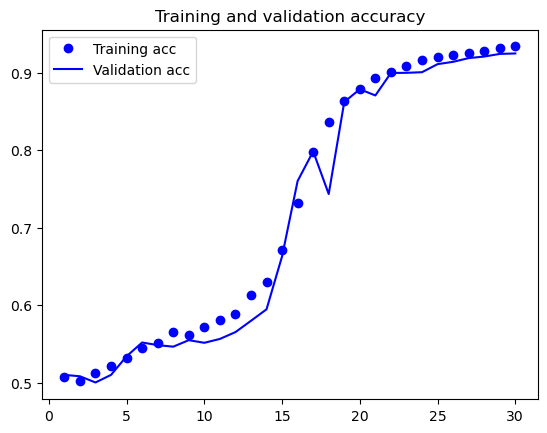

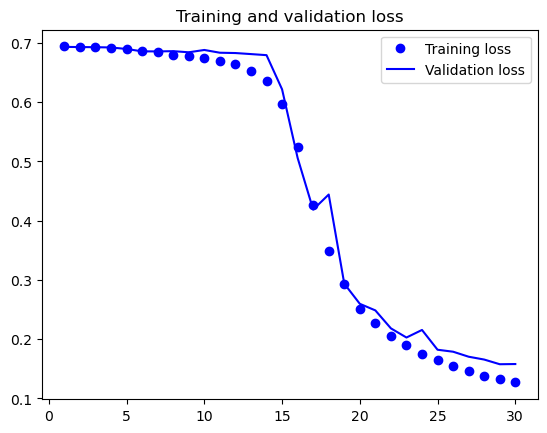

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/6/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/6/train_test_acc",dpi=100)
plt.show()

In [14]:
import csv
with open('results/6/results.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Index', 'Label', 'Prediction'])
    for i, (data_batch, labels_batch) in enumerate(test_dataset):
        predictions = model.predict(data_batch)
        for j in range(len(predictions)):
            writer.writerow([i * BATCH_SIZE + j, labels_batch[j].numpy(), int(predictions[j][0].round())])

1/1 [==============================] - 0s 61ms/step


In [17]:
with open('results/6/results.csv', mode='r') as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        if lines[1] != lines[2]:
            print(lines)

['Index', 'Label', 'Prediction']
['235', '0', '1']
['610', '0', '1']
['800', '0', '1']
['1062', '0', '1']
['1291', '0', '1']
['1317', '0', '1']
['1843', '0', '1']
['2148', '0', '1']
['2697', '0', '1']
['2705', '0', '1']
['3236', '0', '1']
['3789', '0', '1']
['3809', '0', '1']
['4365', '0', '1']
['4395', '0', '1']
['4935', '0', '1']


In [15]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

Found 5000 files belonging to 2 classes.
1/1 [==============================] - 0s 19ms/step
5000
0
235


In [16]:
# write the wrong filenames to a file
with open('results/6/failed_filenames.txt', 'w') as f:
    for item in wrong_filenames:
        f.write("%s\n" % item)

In [17]:
output_folder = 'results/6/failed_images'
file_name = 'results/6/failed_filenames.txt'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

    with open(file_name, 'r') as file:
        lines = file.readlines()

    for line in lines:
        line = line.strip()
        if os.path.exists(line):
            filename = os.path.basename(line)
            shutil.copy(line, os.path.join(output_folder, filename))
        else:
            print(f"Image path '{line}' does not exist.")

In [25]:
failed_images_dataset = image_dataset_from_directory(
    'results/6/failed_images',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

val_loss, val_acc = model.evaluate(failed_images_dataset, batch_size=32)
print(val_loss, val_acc)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory results/4-1/failed_images. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [31]:
img = tf.keras.preprocessing.image.load_img('../../Dataset_Scripts/Datasets/Dataset_4/test/circles_cut/circle_cut_5003.png', target_size=(IMG_SIZE, IMG_SIZE))

In [32]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

(1, 500, 500, 3)
1/1 [==============================] - 0s 16ms/step
Result:  [[0.]]
